In [40]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings('ignore')
import pickle
from _1_load_data import Load_Data
from _2_visuals import Graphs
from _2_chart_functions import Chart_Functions

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''


pd.set_option('display.float_format', '{:,.2f}'.format)

In [41]:
#Setup
dl=Load_Data()
cf=Chart_Functions()
g=Graphs()

df_og=dl.pp_raw_hotel_data()


# __Intro

## Timeseries

In [4]:
g.plot_reviews_timeseries()

# __Barchart-Local vs Foreign

## Function Plotly

In [3]:
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"from_country",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=countries_to_include,others_name="Foreign",
                                    hue="good_review", 
                                    time_series=False,  
                                    #ax=ax1,
                                     )


data1,data2,data3,order,order_green, order_red=list_for_data

In [4]:


fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))

fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Local vs Foreign",500,500,order)
fig.show()



# __Bedroom Type

In [6]:
mapping_dict={1:"Good Review",0: "Bad Review"}
#countries_to_include = ["Philippines"]

df_dropna=df_og[df_og.room_type.isna()==False]

list_for_data=cf.categorical_eda_plots_plotly(df_dropna,"room_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data


In [7]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Room Types",500,1000,order_green)

fig.show()

# __Traveller Type

In [9]:

# Stacked Histplot (Compare Proportions)
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"occupant_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                        )

data1,data2,data3,order,order_green, order_red=list_for_data

In [12]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Occupant Types",500,700,order)

fig.show()

# __Nights Stayed

In [13]:
df_ns=df_og.copy()
df_ns["nights_stayed"]=df_ns["nights_stayed_"].apply(lambda x: str(x))


In [14]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_ns,"nights_stayed",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

In [15]:


fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))

fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)

cf.layout_v1(fig,"Nights Stayed in Hotels",500,500,order,"ascending")
fig.show()

# Timeseries

## __Month

In [16]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"month_name",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=True,month_data=True,  long_dates=True,
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

In [20]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)

cf.layout_v1(fig,"Reviews Per Month",490,1000,order)
fig.show()

## Year

In [21]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"year",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=True,
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

In [22]:




fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Reviews Per Year",500,700,order)
fig.show()

# Reviews

In [25]:
reviews_uni = pickle.load(open('../all_charts/data/reviews_unigram.pkl', "rb"))
reviews_uni

,word,count
2,location,1
3,price,1
5,country,1
7,thank,1
8,comfty,1
...,...,...
23313,hidden_gem,1
23314,discourage,1
23315,disparage,1
23317,thank,1


In [27]:
mask=np.array(Image.open('msgbox.png'))
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = ImageColorGenerator(mask)

# Create a word cloud image
wc = WordCloud(scale=3,
                background_color="white", 
                 max_words=100, mask=mask,
                 collocations=False,
               #stopwords=stopwords, 
               contour_width=10, 
               contour_color='black',
               colormap="tab20c",
               #colormap='Accent',
               #color_func="black",
               width=500, height=500
               )

# Generate a wordcloud
wc.generate(" ".join(tweet for tweet in reviews_uni.word))

# # store to file
# wc.to_file("tweet.png")



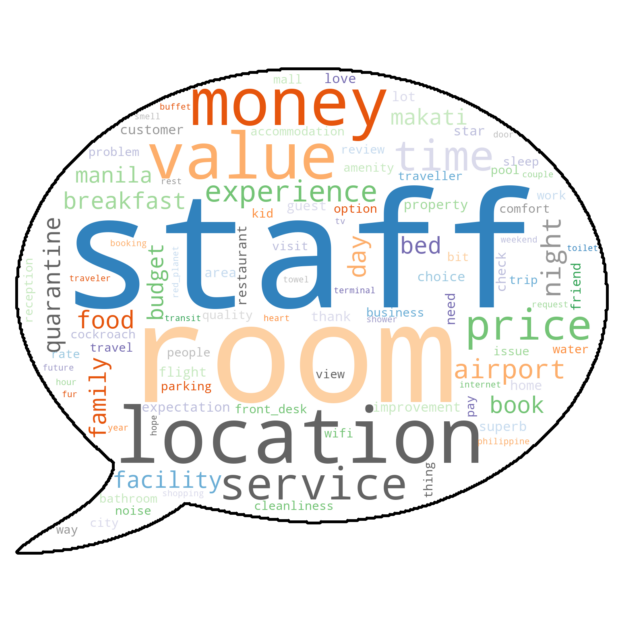

In [28]:
# show
plt.figure(figsize=[15,8],dpi=100)
#plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc, interpolation='bilinear',cmap=plt.cm.gray)
plt.axis("off")
plt.show()

# Hotel Quality- Stars and Number of Facilities

In [29]:
columns=['stars','review_rating','total_reviews','facilities_count','cheapest_price']
df_hotel_level=pickle.load(open("../data/hotel_info_final.pkl", "rb"))
df_hotel_level.shape

df_hotel_level[columns].info()

df_hotel_level['review_rating']=df_hotel_level['review_rating'].astype(float)
df_hotel_level['facilities_count']=df_hotel_level['facilities_count'].astype(float)
df_hotel_level['total_reviews']=df_hotel_level['total_reviews'].apply(lambda x: float(x.replace(",","")))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stars             307 non-null    int64  
 1   review_rating     307 non-null    object 
 2   total_reviews     307 non-null    object 
 3   facilities_count  307 non-null    int64  
 4   cheapest_price    307 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 14.4+ KB


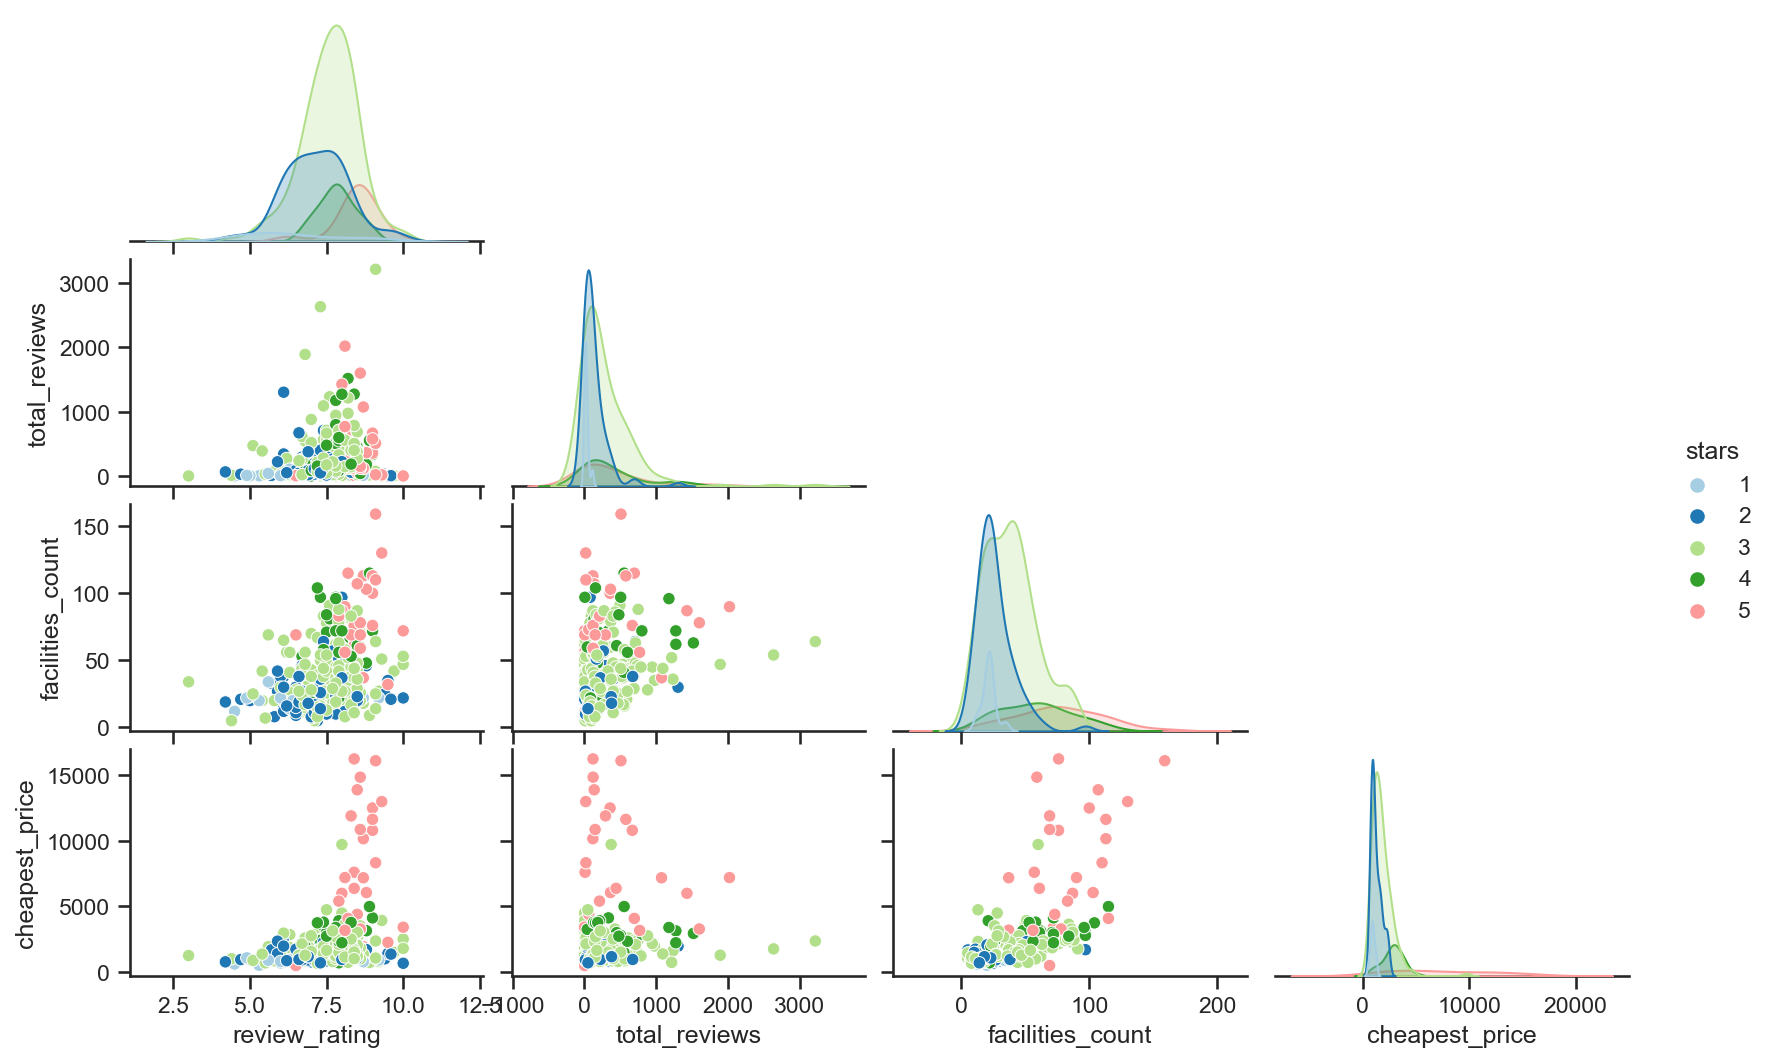

In [30]:
#sns.color_palette("hls", 8)
#g=sns.pairplot(df_hotel_level[columns], hue="stars",palette="Paired",corner=True)
#g.fig.set_size_inches(12,7)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

sns.set(style="ticks")

g=sns.pairplot(df_hotel_level[columns], 
            hue="stars",
            palette="Paired",
            corner=True,
            )
            
g.fig.set_size_inches(12,7)




# Facilities

In [70]:
df_faci = pickle.load(open("data/hotel_level_features.pkl", "rb"))
faci_cols=df_faci.columns.tolist()[15:]
df_faci=df_faci[['hotel_name_'] + faci_cols]

df_faci=df_faci.loc[:,~df_faci.columns.str.contains('_y', case=False)] 

#Drop duplicate values
df_faci.drop(["facilities_count","non-smoking rooms","upper floors accessible by elevator"], axis=1,inplace=True)

df_hotel_level=pickle.load(open("data/hotel_info_final.pkl", "rb"))
df_hotel_level=df_hotel_level[["hotel_name_","review_rating"]]
df_hotel_level

df1=pd.merge(df_faci,df_hotel_level, on="hotel_name_", how="left")
df1['review_rating']=df1['review_rating'].astype(float)
df1['good_review']=np.where(df1["review_rating"]>=7.5,1,0)


In [72]:
df_faci

,hotel_name_,non smoking rooms,free wifi internet access included,breakfast,room-service,free parking,24 hour front desk,restaurant_x,bar_x,airport shuttle_x,swimming pool,fitness room,coffee/tea maker,family rooms_x,spa & wellness centre,rooms/facilities for disabled,air conditioning,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,free toiletries,24-hour front desk,shower,toilet paper,elevator,linens,security alarm,flat-screen tv,daily housekeeping,cctv outside property,room service,designated smoking area,safe,desk,bidet,smoke-free property,baggage storage,cable channels,telephone,key card access,electric kettle,meeting/banquet facilities,laundry,fax/photocopying,wake-up service,concierge,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,ironing service,refrigerator,towels/sheets (extra fee),bathtub or shower,business center,massage,dry cleaning,fitness center,sitting area,car rental,express check-in/out,beach chairs/loungers,open all year,tile/marble floor,shuttle service,invoice provided,breakfast in the room,city view,satellite channels,fitness,secure parking,view,currency exchange,wheelchair accessible,all ages welcome,suit press,parking,coffee house on site,wine/champagne,tea/coffee maker,atm on site,spa,toilet with grab rails,pool/beach towels,parking garage,minibar,fruit,snack bar,bathtub,ironing facilities,adults only,wake-up service/alarm clock,valet parking,iron,convenience store on site,full-body massage,kids' meals,bathrobe,garden,spa facilities,outdoor furniture,carpeted,alarm clock,beach umbrellas,entire unit wheelchair accessible,private check-in/out,shared lounge/tv area,dining table,terrace,tour desk,packed lunches,guest bathroom,special diet meals (on request),spa/wellness packages,hair/beauty salon,hardwood or parquet floors,fan,pool with view,upper floors accessible by stairs only,pool bar,soundproof rooms,sauna,steam room,foot massage,dining area,sun deck,back massage,pool is on rooftop,soundproof,locker rooms,happy hour,street parking,coffee machine,evening entertainment,kids' pool,head massage,golf course (within 2 miles),sofa,live music/performance,interconnecting room(s) available,heating,hot tub/jacuzzi,spa lounge/relaxation area,kid-friendly buffet,neck massage,couples' massage,balcony,hand massage,lockers,kitchenette,beauty services,dryer,babysitting/child services,raised toilet,lowered sink,manicure,pedicure,microwave,hair treatments,nightclub/dj,indoor play area,cleaning products,laptop safe,private entrance,foot bath,casino,kitchenware,fenced pool,board games/puzzles,pay-per-view channels,bathroom emergency cord,makeup services,haircut,hair coloring,hairstyling,grocery deliveries,stovetop,personal trainer,bicycle rental,facial treatments,infinity pool,landmark view,drying rack for clothing,hypoallergenic,hypoallergenic room available,playground,ipod dock,shallow end,themed dinners,body treatments,body scrub,pool view,carbon monoxide detector,karaoke,streaming service (like netflix),radio,kids' club,heated pool,suitable for kids,temporary art galleries,ocean view,fitness classes,massage chair,kitchen,yoga classes,movie nights,outdoor play equipment for kids,entertainment staff,bike tours,waxing services,game room,body wrap,visual aids (braille),walk-in closet,dishwasher,pool table,saltwater pool,bowling,tour or class about local culture,tennis equipment,plunge pool,hot tub,walking tours,live sports events (broadcast),bar crawls,sofa bed,"books, dvds or music for children",tennis court,oven,patio,bbq facilities,dvd player,strollers,cooking class,waterslide,mini golf,picnic area,pet bowls,pool cover,hearing accessible,vending machine (drinks),light therapy,fold-up bed,garden view,private pool,extra long beds (> 6.5 ft),chapel/shrine,child safety socket covers,washing machine,toaster,shared kitchen,outdoor dining area,shared toilet,cycling,racquetball,aerobics,tu

In [73]:

def get_long_format_proportions (df_faci):
    df_to_melt=df_faci.drop(["review_rating","good_review"], axis=1)
    long_df = pd.melt(
        df_to_melt,
        id_vars=['hotel_name_'],
        #value_vars=['inc_q', 'age']
    )

    long_df


    grouped=long_df.groupby(["variable"]).agg(
        sum_=('value', 'sum'),
        count_=('hotel_name_', 'count')).sort_values(by="sum_", ascending=False).reset_index()

    grouped["Proportion"]=grouped["sum_"]/grouped["count_"]*100
    return grouped

In [74]:
green=get_long_format_proportions (df1[df1.good_review==1])[["variable","Proportion"]]
red=get_long_format_proportions (df1[df1.good_review==0])[["variable","Proportion"]]

merged=pd.merge(green,red,on="variable", how="outer")
merged.columns=["Variable", "Green_prop","Red_prop"]

merged.set_index("Variable",inplace=True)
min=merged.min(axis=1)
merged=merged.sub(merged.min(axis=1).values, axis='rows')
merged["Min"]=min


data1=merged[[merged.columns[0]]]
data2=merged[[merged.columns[1]]]
data3=merged[["Min"]]



#Return custom Orders
order=data3.sort_values(by="Min",ascending=False).index
order_green=data1.sort_values(by=merged.columns[0],ascending=False).index
order_red=data2.sort_values(by=merged.columns[1],ascending=False).index

In [98]:
len(data2[data2.columns[0]].values.tolist())
len(data2.index)
data2[data2.columns[0]].values.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.091019945997743,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5530877101297875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.519902447522,
 0.0,
 0.0,
 0.0,
 1.093110356240743,
 3.2052957059489557,
 3.2052957059489557,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.08056789478269,
 0.0,
 0.0,
 0.0,
 0.6793833289783109,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6592631303893413,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.60282205382806,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.784513544116365,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.919519205644109,
 0.0,
 0.

In [93]:
data2

,Red_prop
Variable,
air conditioning,0.00
cctv in common areas,0.00
non smoking rooms,0.00
cctv outside property,0.00
24-hour front desk,0.00
...,...
pet basket,0.78
water park,0.78
visual aids (tactile signs),0.78


In [103]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#fig.add_trace(go.Bar(y=data3.index, x=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,orientation='h',width=0.5),row=1, col=1)
fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",orientation='h'),row=1, col=1)
#fig.add_trace(go.Bar(y=data2.index, x=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red",orientation='h'),row=1, col=2)

#fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",width=100),row=1, col=1)

cf.layout_v2(fig,"Facilities Most Likely to <br>Contribute to a Positive Review",500,600,order_green)
fig.show()

In [107]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#fig.add_trace(go.Bar(y=data3.index, x=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,orientation='h',width=0.5),row=1, col=1)
#fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(y=data2.index, x=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red",orientation='h'),row=1, col=1)

cf.layout_v2(fig,"Facilities Most Likely to <br>Contribute to a Negative Review",500,600,order_red)
fig.show()

In [100]:
fig.print_grid

<bound method BaseFigure.print_grid of Figure({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})>